In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import expanduser
import pandas as pd
from uai2017experiments.utils import AUPC
import scipy.stats
import numpy as np

def KS_statistic(p_values: np.ndarray) -> float:
    """Kolmogorov-Smirnov test statistics"""
    return scipy.stats.kstest(p_values, 'uniform')[0]

def type_I_005(p_values: np.ndarray) -> float:
    """Kolmogorov-Smirnov test statistics"""
    return np.mean(p_values < 0.05)


filename = expanduser(
    "~/Dropbox/research/2014 rcm/workspace/python/KRCIT/uai2017experiments/new_results/conditional.csv")
column_names = ['seed', 'n', 'max_rel', 'hops', 'hypothesis', 'actual_size', 'KCIT', 'SDCIT', 'R-KCIT', 'R-SDCIT',
                'RK-KCIT', 'RK-SDCIT', 'KRCIT-K', 'KRCIT-SD']
df = pd.read_csv(filename, names=column_names)
del df['actual_size']
df = df.melt(id_vars=['seed', 'n', 'max_rel', 'hops', 'hypothesis'], var_name='method', value_name='p-value')
df = df[df.hops != -1]

sizesize = 3
aspectaspect = 1.85

pal = sns.color_palette("Paired", 8)
hue_order=['KCIT', 'SDCIT', 'R-KCIT', 'R-SDCIT','RK-KCIT', 'RK-SDCIT', 'KRCIT-K', 'KRCIT-SD']

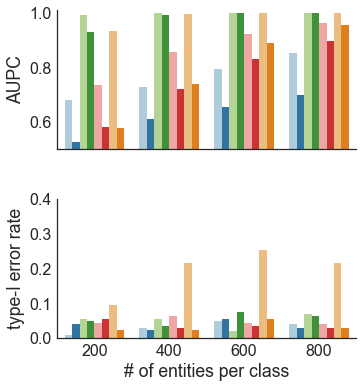

In [30]:
sns.set(context='paper', font_scale=2, style='white', palette=sns.color_palette('Paired', 8))
cur_df_alt = df[(df.max_rel == 3) & (df.hops == 1) & (df.hypothesis == 'alternative')]
cur_df_alt = cur_df_alt.groupby(by=['n', 'method', 'hypothesis']).aggregate(AUPC).reset_index()
cur_df_null = df[(df.max_rel == 3) & (df.hops == 1) & (df.hypothesis == 'null')]
cur_df_null = cur_df_null.groupby(by=['n', 'method', 'hypothesis']).aggregate(type_I_005).reset_index()



cur_df_null['rr'] = 0
cur_df_alt['rr'] = 1
df_con = pd.concat([cur_df_null, cur_df_alt], ignore_index=True)
g = sns.factorplot(x='n', y='p-value', hue='method', row='rr', data=df_con, row_order=[1,0], size=sizesize, aspect=aspectaspect, hue_order=hue_order, kind='bar', sharey=False, legend=False);
g.set_titles('')
g.axes.flat[0].set_ylim(0.5,1.01);
g.axes.flat[0].set_ylabel('AUPC');
g.axes.flat[1].set_ylim(0.0,0.4);
g.axes.flat[1].set_ylabel('type-I error rate');
g.axes.flat[1].set_xlabel('# of entities per class');
g.axes.flat[1].set_yticks([0.0,0.1,0.2,0.3,0.4], minor=False)
plt.savefig(expanduser("~/Dropbox/research/2014 rcm/workspace/python/KRCIT/uai2017experiments/new_figures/conditional_by_n.pdf"), transparent=True, bbox_inches='tight', pad_inches=0.02)
plt.close()

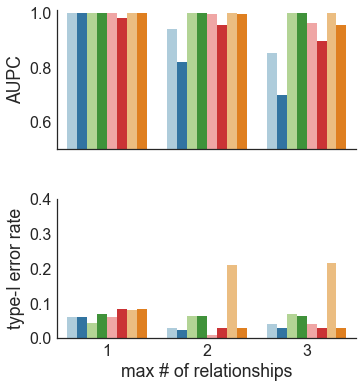

In [31]:
sns.set(context='paper', font_scale=2, style='white', palette=sns.color_palette('Paired', 8))
cur_df_alt = df[(df.n==800) & (df.hops==1) & (df.hypothesis == 'alternative')]
cur_df_alt = cur_df_alt.groupby(by=['max_rel', 'method', 'hypothesis']).aggregate(AUPC).reset_index()
cur_df_null = df[(df.n==800) & (df.hops==1) & (df.hypothesis == 'null')]
cur_df_null = cur_df_null.groupby(by=['max_rel', 'method', 'hypothesis']).aggregate(type_I_005).reset_index()



cur_df_null['rr'] = 0
cur_df_alt['rr'] = 1
df_con = pd.concat([cur_df_null, cur_df_alt], ignore_index=True)
g = sns.factorplot(x='max_rel', y='p-value', hue='method', row='rr', data=df_con, row_order=[1,0], size=sizesize, aspect=aspectaspect, hue_order=hue_order, kind='bar', sharey=False, legend=False);
g.set_titles('')
g.axes.flat[0].set_ylim(0.5,1.01);
g.axes.flat[0].set_ylabel('AUPC');
g.axes.flat[1].set_ylim(0.0,0.4);
g.axes.flat[1].set_ylabel('type-I error rate');
g.axes.flat[1].set_xlabel('max # of relationships');
g.axes.flat[1].set_yticks([0.0,0.1,0.2,0.3,0.4], minor=False)
plt.savefig(expanduser("~/Dropbox/research/2014 rcm/workspace/python/KRCIT/uai2017experiments/new_figures/conditional_by_maxrel.pdf"), transparent=True, bbox_inches='tight', pad_inches=0.02)
plt.close()

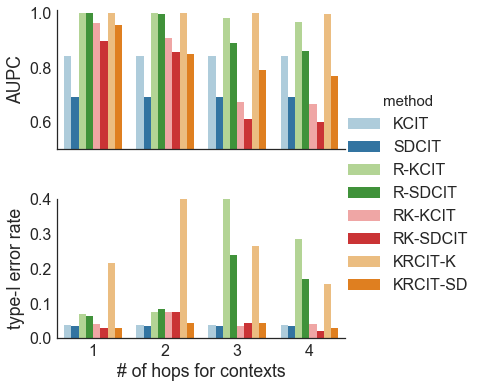

In [32]:
sns.set(context='paper', font_scale=2, style='white', palette=sns.color_palette('Paired', 8))
cur_df_alt = df[(df.n==800) & (df.max_rel==3) & (df.hypothesis == 'alternative')]
cur_df_alt = cur_df_alt.groupby(by=['hops', 'method', 'hypothesis']).aggregate(AUPC).reset_index()
cur_df_null = df[(df.n==800) & (df.max_rel==3) & (df.hypothesis == 'null')]
cur_df_null = cur_df_null.groupby(by=['hops', 'method', 'hypothesis']).aggregate(type_I_005).reset_index()

# experiments performed multiple times.... so... just post-processing.
cur_df_null.loc[cur_df_null.method == 'SDCIT', 'p-value'] = np.mean(cur_df_null[cur_df_null.method == 'SDCIT']['p-value'])
cur_df_null.loc[cur_df_null.method == 'KCIT', 'p-value'] = np.mean(cur_df_null[cur_df_null.method == 'KCIT']['p-value'])

cur_df_alt.loc[cur_df_alt.method == 'SDCIT', 'p-value'] = np.mean(cur_df_alt[cur_df_alt.method == 'SDCIT']['p-value'])
cur_df_alt.loc[cur_df_alt.method == 'KCIT', 'p-value'] = np.mean(cur_df_alt[cur_df_alt.method == 'KCIT']['p-value'])


cur_df_null['rr'] = 0
cur_df_alt['rr'] = 1
df_con = pd.concat([cur_df_null, cur_df_alt], ignore_index=True)
g = sns.factorplot(x='hops', y='p-value', hue='method', row='rr', data=df_con, row_order=[1,0], size=sizesize, aspect=aspectaspect, hue_order=hue_order, kind='bar', sharey=False);
g.set_titles('')
g.axes.flat[0].set_ylim(0.5,1.01);
g.axes.flat[0].set_ylabel('AUPC');
g.axes.flat[1].set_ylim(0.0,0.4);
g.axes.flat[1].set_ylabel('type-I error rate');
g.axes.flat[1].set_xlabel('# of hops for contexts');
g.axes.flat[1].set_yticks([0.0,0.1,0.2,0.3,0.4], minor=False)
plt.savefig(expanduser("~/Dropbox/research/2014 rcm/workspace/python/KRCIT/uai2017experiments/new_figures/conditional_by_hops.pdf"), transparent=True, bbox_inches='tight', pad_inches=0.02)
plt.close()